In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dcor

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
df = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_CNN_testing_metrics.csv')

In [3]:
df.columns

Index(['object_id', 'specz', 'g_cmodel_mag', 'NUMBER_IN_CENTER_30PX_DIAMETER',
       'NUMBER_IN_CENTER_20PX_DIAMETER', 'NUMBER_IN_CENTER_10PX_DIAMETER',
       'NUMBER', 'PETRO_RADIUS', 'X_IMAGE', 'Y_IMAGE', 'XMIN_IMAGE',
       'XMAX_IMAGE', 'YMIN_IMAGE', 'YMAX_IMAGE', 'ISOAREA_IMAGE',
       'ISOAREA_WORLD', 'A_IMAGE', 'B_IMAGE', 'THETA_IMAGE', 'THETA_WORLD',
       'MU_MAX', 'ELLIPTICITY', 'FLUX_RADIUS', 'SPHEROID_SERSICN',
       'distance_from_center', 'photoz', 'bias', 'abs_bias', 'outlier_rate',
       'loss', 'rmse'],
      dtype='object')

In [4]:
bins = np.arange(0, 4+0.1, 0.1)

In [5]:
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. ])

In [6]:
df['specz_bins'] = pd.cut(df['specz'], bins=bins)

In [7]:
df['specz_bins']

0        (0.4, 0.5]
1        (0.2, 0.3]
2        (0.5, 0.6]
3        (0.5, 0.6]
4        (0.4, 0.5]
            ...    
42955    (0.7, 0.8]
42956    (0.9, 1.0]
42957    (0.6, 0.7]
42958    (1.4, 1.5]
42959    (0.8, 0.9]
Name: specz_bins, Length: 42960, dtype: category
Categories (40, interval[float64, right]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (3.6, 3.7] < (3.7, 3.8] < (3.8, 3.9] < (3.9, 4.0]]

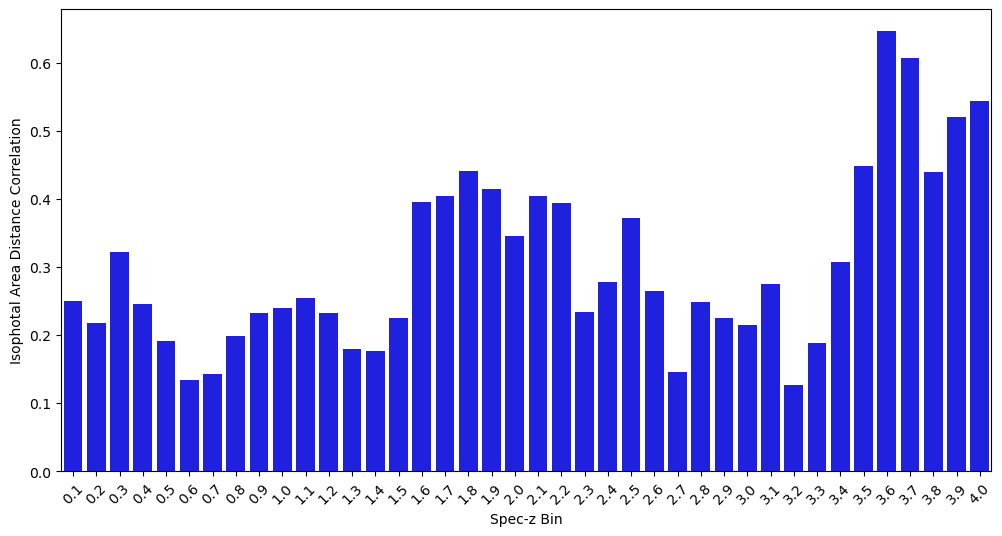

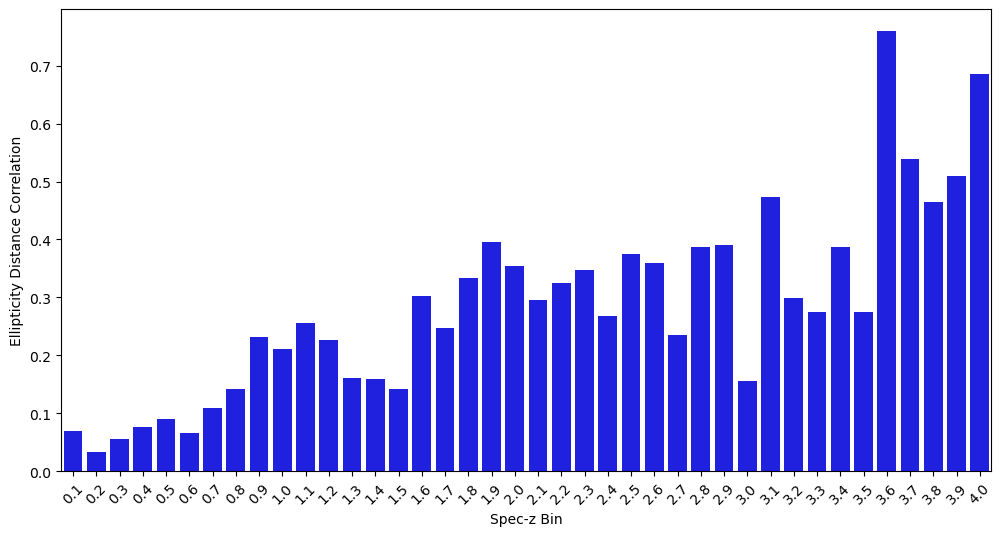

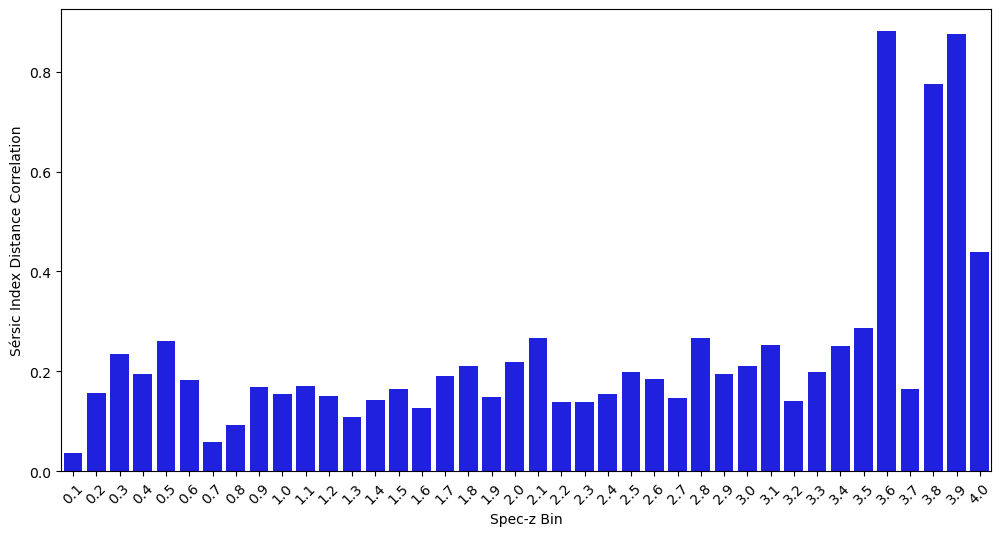

In [8]:
params = ['ISOAREA_IMAGE', 'ELLIPTICITY', 'SPHEROID_SERSICN']
param_names = ['Isophotal Area', 'Ellipticity', 'Sérsic Index']
for i, param in enumerate(params):
    
    def calculate_dcor(bin):
        if len(bin) > 1:
            return dcor.distance_correlation(bin[param], bin['rmse'])
        else:
            return np.nan
    corr_results = df.groupby('specz_bins').apply(calculate_dcor)
    corr_df = corr_results.reset_index()
    corr_df.columns = ['specz_bin', 'corr']
    corr_df['specz_bin'] = corr_df['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    plt.figure(figsize=(12,6))
    sns.barplot(x='specz_bin', y='corr', data=corr_df, color='blue')
    plt.xticks(rotation=45)
    plt.xlabel('Spec-z Bin')
    plt.ylabel(f'{param_names[i]} Distance Correlation')
    plt.show()

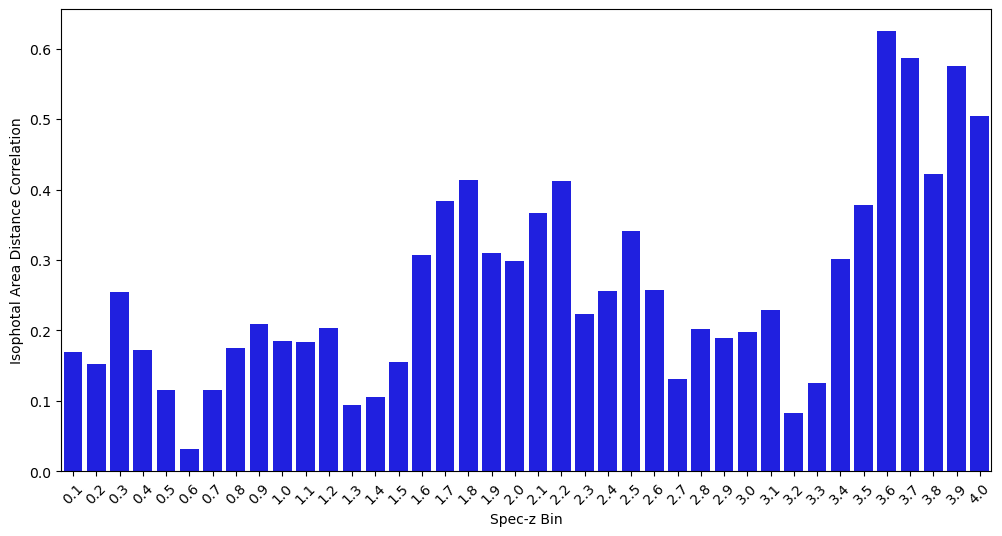

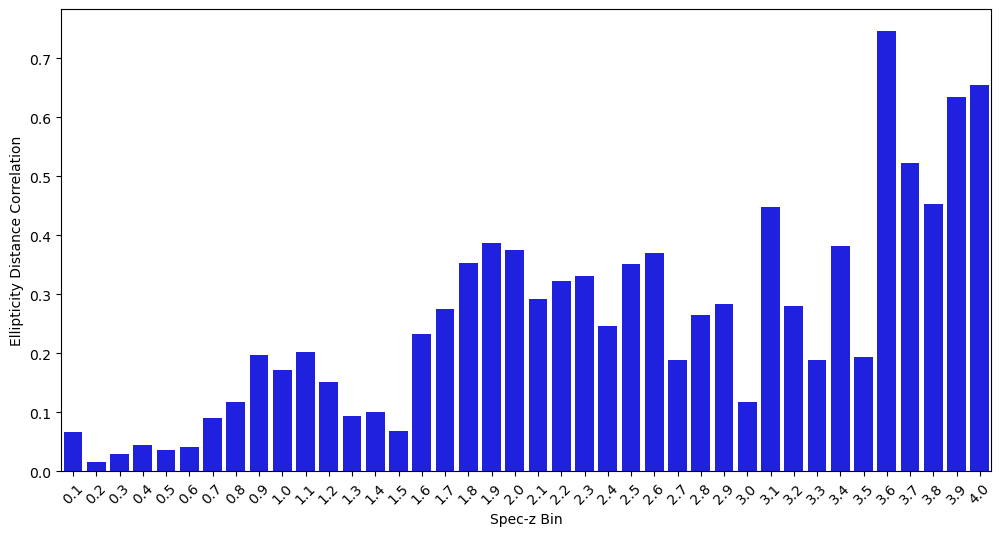

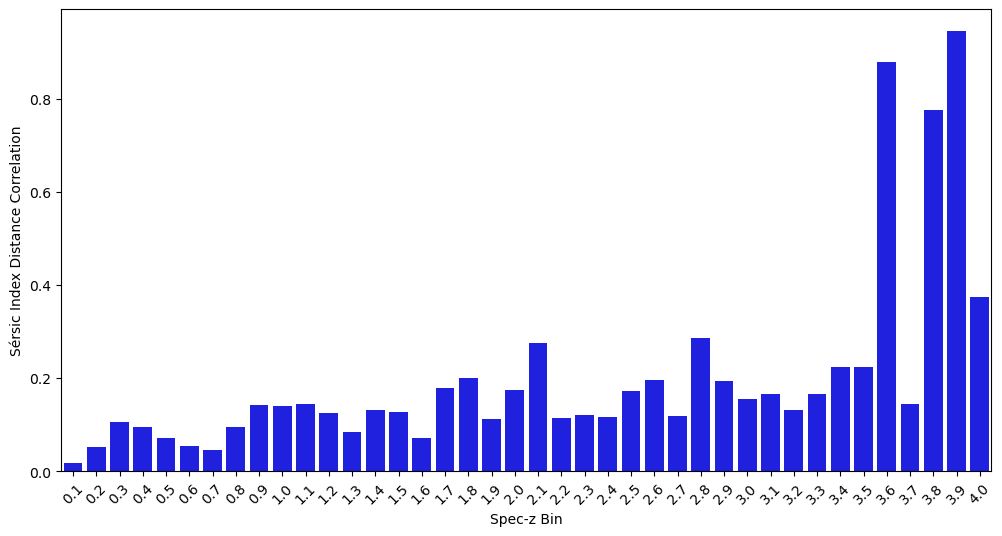

In [9]:
params = ['ISOAREA_IMAGE', 'ELLIPTICITY', 'SPHEROID_SERSICN']
param_names = ['Isophotal Area', 'Ellipticity', 'Sérsic Index']

for i, param in enumerate(params):
    
    def calculate_dcor(bin):
        if len(bin) > 1:
            return dcor.distance_correlation(bin[param], bin['outlier_rate'])
        else:
            return np.nan
    corr_results = df.groupby('specz_bins').apply(calculate_dcor)
    corr_df = corr_results.reset_index()
    corr_df.columns = ['specz_bin', 'corr']
    corr_df['specz_bin'] = corr_df['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    plt.figure(figsize=(12,6))
    sns.barplot(x='specz_bin', y='corr', data=corr_df, color='blue')
    plt.xticks(rotation=45)
    plt.xlabel('Spec-z Bin')
    plt.ylabel(f'{param_names[i]} Distance Correlation')
    plt.show()

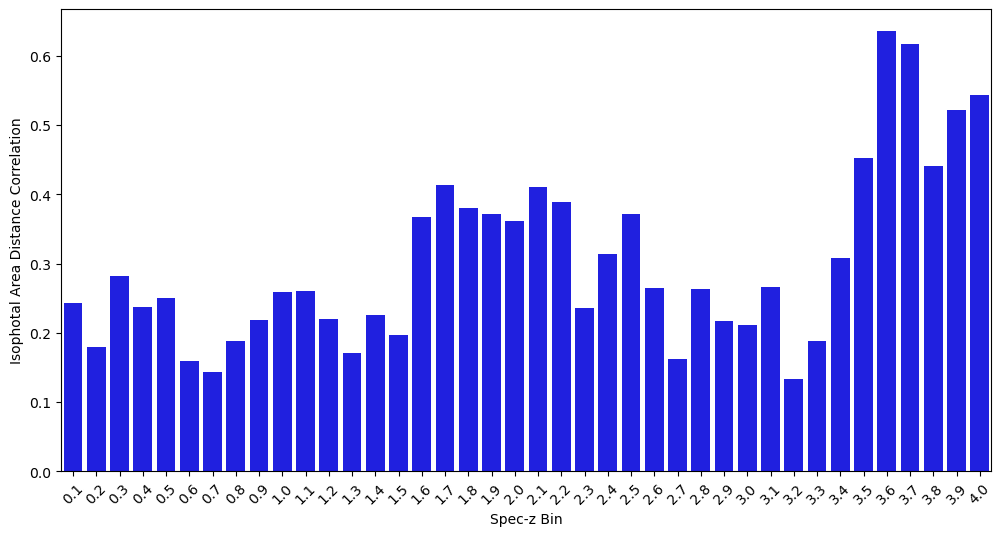

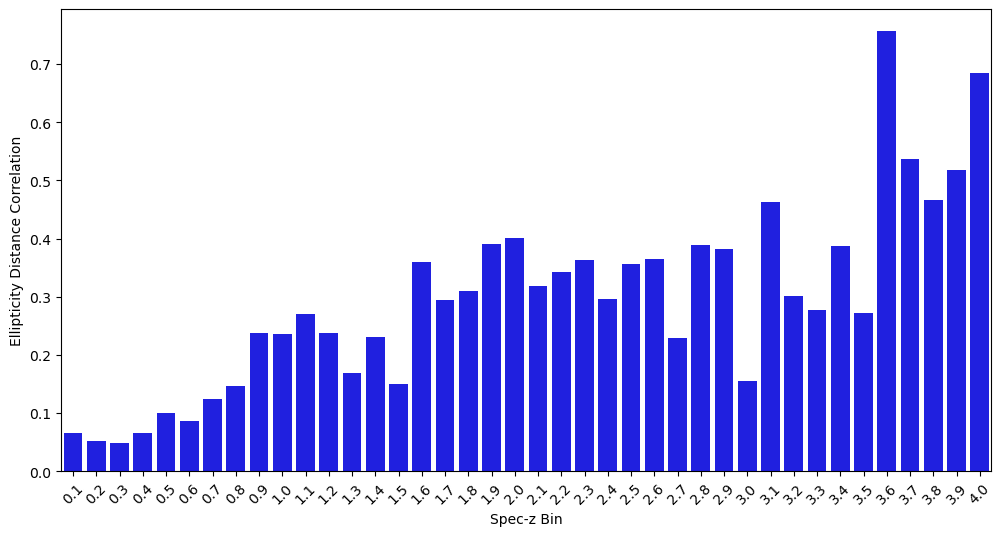

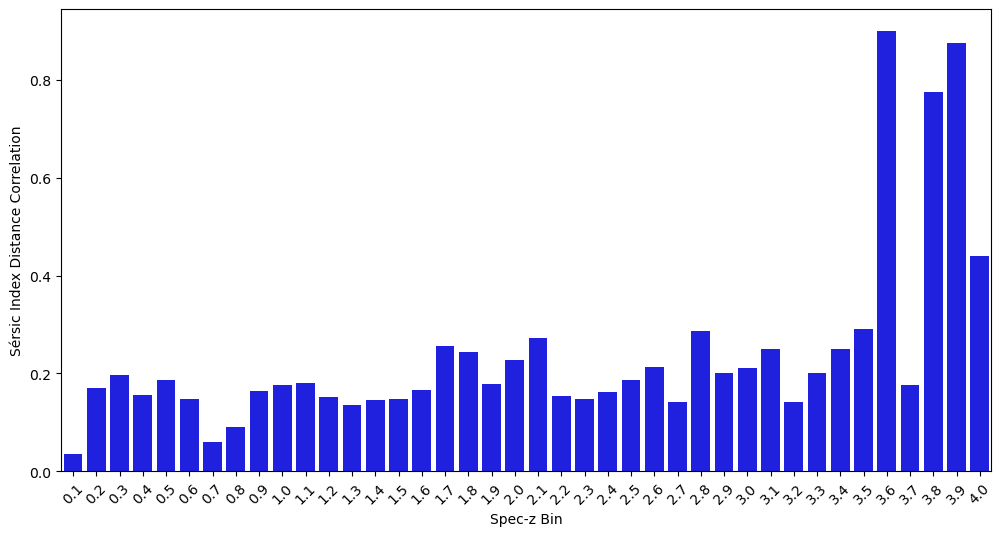

In [10]:
params = ['ISOAREA_IMAGE', 'ELLIPTICITY', 'SPHEROID_SERSICN']
param_names = ['Isophotal Area', 'Ellipticity', 'Sérsic Index']

for i, param in enumerate(params):
    
    def calculate_dcor(bin):
        if len(bin) > 1:
            return dcor.distance_correlation(bin[param], bin['bias'])
        else:
            return np.nan
    corr_results = df.groupby('specz_bins').apply(calculate_dcor)
    corr_df = corr_results.reset_index()
    corr_df.columns = ['specz_bin', 'corr']
    corr_df['specz_bin'] = corr_df['specz_bin'].astype(str).str.split(', ').str[1].str[:-1]
    plt.figure(figsize=(12,6))
    sns.barplot(x='specz_bin', y='corr', data=corr_df, color='blue')
    plt.xticks(rotation=45)
    plt.xlabel('Spec-z Bin')
    plt.ylabel(f'{param_names[i]} Distance Correlation')
    plt.show()